In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
from warnings import filterwarnings
import matplotlib.pyplot as plt
filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\nilav\\NCI Cell Lines\\Gefitinib_metabolic_NCI.csv')
data.head(2)

,Cell Line,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,...,O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),cells,Cell names,Gefitinib
0,Breast_BT549,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,...,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,BT549,BR:BT-549,4.286667
1,Breast_HS578T,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,NaN,0.005778,0.003199,...,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154,HS578T,BR:HS 578T,5.173333


In [3]:
drug = data.pop('Gefitinib')
drug.head()

0    4.286667
1    5.173333
2    5.078333
3    5.158333
4    5.231667
Name: Gefitinib, dtype: float64

In [4]:
X = data.select_dtypes('float64')
X.head(2)

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,PIP2(16:0/18:1(11Z)) ; PIP2(16:0/18:1(9Z)) ; PIP2(16:1(9Z)/18:0) ; PIP2(18:0/16:1(9Z)) ; PIP2(18:1(11Z)/16:0) ; PIP2(18:1(9Z)/16:0),"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z))
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.071269,0.029462,0.029300,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391
1,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,NaN,0.005778,0.003199,0.011203,...,0.059958,0.026807,0.021282,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154


In [5]:
X.fillna(0.0, inplace=True)

In [6]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [7]:
labels = []
drug_mean = drug.mean()
for i in drug:
    if i >= drug_mean:
        labels.append('N')
    else:
        labels.append('R')
y = pd.Series(labels)

In [8]:
drug_mean

5.351870748299321

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X,y = smote.fit_resample(X,y)

y.value_counts()

1    31
0    31
dtype: int64

In [11]:
'''

from xgboost import plot_importance
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(class_weight = 'balanced', n_estimators = 150, random_state = 43)
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

'''

'\n\nfrom xgboost import plot_importance\nfrom sklearn.model_selection import train_test_split\n\nmodel = RandomForestClassifier(class_weight = \'balanced\', n_estimators = 150, random_state = 43)\nmodel.fit(X, y)\nimportances = model.feature_importances_\nindices = np.argsort(importances)[::-1]\n\nplt.figure()\nplt.title("Feature importances")\nplt.bar(range(X.shape[1]), importances[indices],\n        color="lightsalmon", align="center")\nplt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)\nplt.xlim([-1, X.shape[1]])\nplt.show()\n\n'

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
#sfm = SelectFromModel(model, threshold = 0.006)
#sfm.fit(X,y)

#X = pd.DataFrame(data = sfm.transform(X), columns = X.columns[sfm.get_support(1)])

indices = X.index.values


X_train, X_test, train_index, test_index = train_test_split(X,indices, test_size = 0.33, random_state = 43)
y_train, y_test = y.iloc[train_index], y.iloc[test_index]
model = RandomForestClassifier(class_weight = 'balanced', n_estimators = 150, random_state = 43)

rfecv = RFECV(model, min_features_to_select = 1, step = 1, cv = StratifiedKFold(5), scoring = 'precision')
#model.fit(X_train, y_train)

rfecv.fit(X_train, y_train)

rfe = RFE(model, n_features_to_select = rfecv.n_features_, step = 1)
rfe.fit(X_train, y_train)

prediction = rfe.predict_proba(X_test)[:, 1]
y_pred = rfe.predict(X_test)

print(f'Accuracy on training data: {accuracy_score(y_train, rfe.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, rfe.predict(X_test))}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.42857142857142855
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.30      0.38      0.33         8

    accuracy                           0.43        21
   macro avg       0.42      0.42      0.42        21
weighted avg       0.45      0.43      0.44        21



In [13]:
len(X_train.columns)

2181

Text(50.722222222222214, 0.5, 'True Labels')

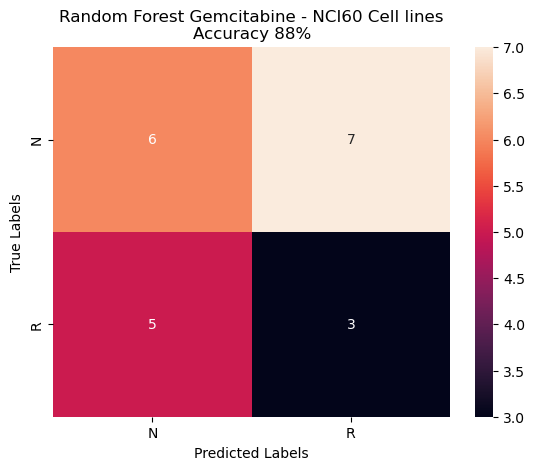

In [14]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('Random Forest Gemcitabine - NCI60 Cell lines\nAccuracy 88%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

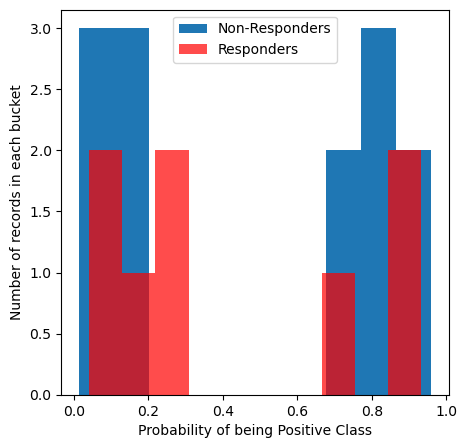

In [15]:
plt.figure(figsize=(5, 5))
plt.hist(prediction[y_test==0], label='Non-Responders')
plt.hist(prediction[y_test==1], label='Responders', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [16]:
responders = prediction[y_test == 1]
count = 0
for i in responders: 
    if i >= max(prediction[y_test == 0]):
        count+=1
count, count/len(responders)

(0, 0.0)

In [17]:
max(prediction[y_test == 0])

0.96

In [18]:
df_rf_test = X_test.copy()
df_rf_test.loc[test_index, 'test_proba'] = prediction
df_rf_test.loc[test_index, 'target'] = y_test
df1 = pd.concat([X_train, df_rf_test], sort=False).sort_index()

In [19]:
df1_main = df1.iloc[:49, ]
x = max(prediction[y_test == 0])
df1_main = df1_main.loc[(df1_main['test_proba'] > x)]
df1_main.shape

(0, 2183)

In [20]:
model2 = SVC(kernel = 'linear', C=1, gamma='auto', probability=True)

rfecv2 = RFECV(model2, min_features_to_select = 1, scoring = 'precision', step = 1, cv = StratifiedKFold(5))
rfecv2.fit(X_train, y_train)

#model2.fit(X_train, y_train)

rfe2 = RFE(model2, n_features_to_select = rfecv2.n_features_, step = 1)
rfe2.fit(X_train, y_train)

prediction2 = rfe2.predict_proba(X_test)[:, 1]
y_pred = rfe2.predict(X_test)
print(f'Accuracy on training data: {accuracy_score(y_train, rfe2.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, rfe2.predict(X_test))}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 0.8292682926829268
Accuracy on testing data: 0.7619047619047619
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.67      0.75      0.71         8

    accuracy                           0.76        21
   macro avg       0.75      0.76      0.75        21
weighted avg       0.77      0.76      0.76        21



Text(50.722222222222214, 0.5, 'True Labels')

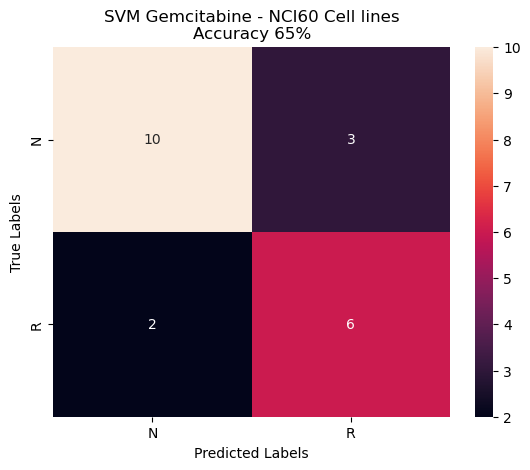

In [21]:
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('SVM Gemcitabine - NCI60 Cell lines\nAccuracy 65%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

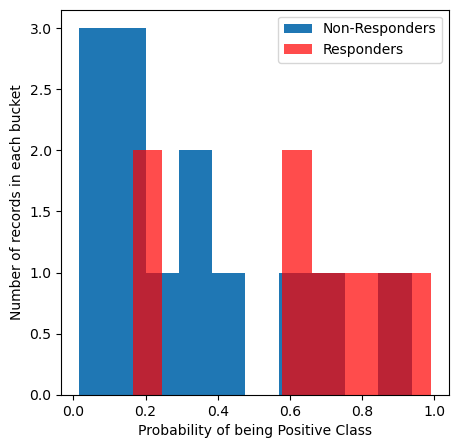

In [22]:
plt.figure(figsize=(5, 5))
plt.hist(prediction2[y_test==0], label='Non-Responders')
plt.hist(prediction2[y_test==1], label='Responders', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [23]:
resp_svm = prediction2[y_test == 1]
count = 0
for i in resp_svm:
    if i >= max(prediction2[y_test == 0]):
        count+=1
count, count/len(resp_svm)

(1, 0.125)

In [24]:
max(prediction2[y_test == 0])

0.9371261382681435

In [25]:
df_svm_test = X_test.copy()
df_svm_test.loc[test_index, 'test_proba'] = prediction2

df2 = pd.concat([X_train, df_svm_test], sort=False).sort_index()

In [26]:
df2_main = df2.iloc[:49, ]
df2_main = df2_main.loc[(df2_main['test_proba'] > max(prediction2[y_test == 0]))]
df2_main

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba
6,0.005588,0.004644,1.364809,0.135459,0.0,0.0,0.0,0.009729,0.004694,0.014806,...,0.034059,0.023589,0.030071,0.020941,0.076639,0.03705,0.018037,0.026653,0.048694,0.991232


In [27]:
model3 = XGBClassifier()
#model3.fit(X_train, y_train)

rfecv3 = RFECV(model3, min_features_to_select=1, step=1, scoring='precision', cv=StratifiedKFold(5))
rfecv3.fit(X_train, y_train)

#prediction3 = model3.predict_proba(X_test)[:, 1]

rfe3 = RFE(model3, n_features_to_select = rfecv3.n_features_, step = 1)
rfe3.fit(X_train, y_train)
prediction3 = rfe3.predict_proba(X_test)[:, 1]
y_pred = rfe3.predict(X_test)

print(f'Accuracy on training data: {accuracy_score(y_train, rfe3.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.6190476190476191
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.50      0.75      0.60         8

    accuracy                           0.62        21
   macro avg       0.64      0.64      0.62        21
weighted avg       0.67      0.62      0.62        21



Text(50.722222222222214, 0.5, 'True Labels')

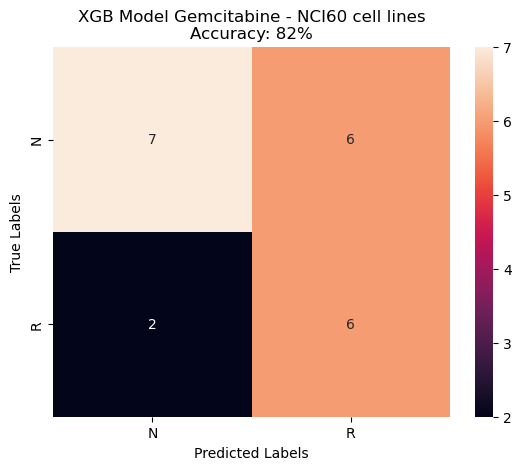

In [28]:
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('XGB Model Gemcitabine - NCI60 cell lines\nAccuracy: 82%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

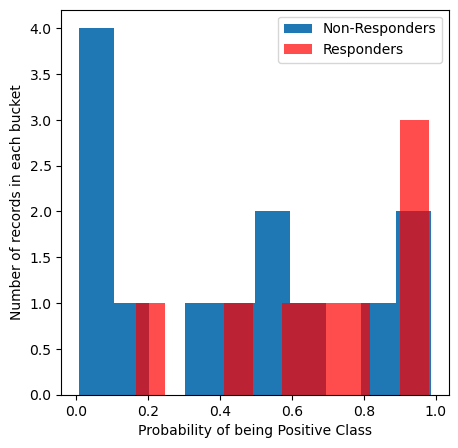

In [29]:
plt.figure(figsize=(5, 5))
plt.hist(prediction3[y_test==0], label='Non-Responders')
plt.hist(prediction3[y_test==1], label='Responders', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [30]:
resp_xg = prediction3[y_test == 1]
count = 0
for i in resp_xg:
    if i >= max(prediction3[y_test == 0]):
        count += 1
count, count/len(resp_xg)

(0, 0.0)

In [31]:
max(prediction3[y_test == 0])

0.9872574

In [32]:
df_xg = X_test.copy()
df_xg.loc[test_index, 'test_proba'] = prediction3

df3 = pd.concat([X_train, df_xg], sort=False).sort_index()
df3

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.029462,0.029300,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,NaN
1,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,0.000000,0.005778,0.003199,0.011203,...,0.026807,0.021282,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154,NaN
2,0.030946,0.006278,3.830076,0.384303,0.027088,0.065463,0.002946,0.009472,0.002344,0.010895,...,0.031639,0.026098,0.029986,0.025863,0.053371,0.038207,0.023270,0.030655,0.040250,NaN
3,0.008574,0.005661,0.296663,0.035179,0.005575,0.026321,0.001608,0.020112,0.003865,0.016057,...,0.029439,0.032452,0.034177,0.022305,0.080242,0.029226,0.019556,0.033062,0.040780,NaN
4,0.012726,0.003326,0.000000,0.000000,0.005354,0.037794,0.002402,0.013558,0.003402,0.013344,...,0.023395,0.027523,0.018876,0.016423,0.057103,0.022155,0.011501,0.014310,0.034584,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.029710,0.005494,1.871882,0.187526,0.030761,0.126784,0.004256,0.008368,0.002346,0.009851,...,0.035073,0.025938,0.040352,0.029576,0.074567,0.036209,0.023007,0.040206,0.040569,0.408147
58,0.023170,0.007654,2.268530,0.227312,0.020314,0.067743,0.002511,0.009551,0.003074,0.026141,...,0.044544,0.036583,0.044355,0.030253,0.060527,0.040154,0.027552,0.042445,0.048388,NaN
59,0.008710,0.008847,1.489213,0.151713,0.013773,0.032964,0.001881,0.003826,0.002037,0.012085,...,0.027994,0.018294,0.033230,0.022999,0.055171,0.029840,0.020976,0.030185,0.030732,NaN
60,0.005964,0.020693,0.109581,0.010219,0.026638,0.015616,0.001966,0.021672,0.007119,0.027363,...,0.013706,0.017275,0.038579,0.017281,0.064956,0.028227,0.023974,0.022860,0.028829,NaN


In [33]:
df3_main = df3.iloc[:49, ]
df3_main = df3_main.loc[(df3_main['test_proba'] > max(prediction3[y_test == 0]))]
df3_main.shape

(0, 2182)

In [34]:
y_train.shape

(41,)

In [35]:
y_test.shape

(21,)

In [36]:
unique, counts = np.unique(y_train, return_counts=True)

In [37]:
dict(zip(unique, counts))

{0: 18, 1: 23}

In [38]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 13, 1: 8}

In [39]:
common_list = []
common_list.extend(list(df1_main.index.values))
common_list.extend(list(df2_main.index.values))
common_list.extend(list(df3_main.index.values))
cl = set(common_list)

In [40]:
with open('master_list_metabolomics.txt', 'a+') as f:
    for i in cl:
        f.write(f'{i}\n')

In [41]:
cl

{6}

In [42]:
df1_total = df1.iloc[:49, ]
df1_total = df1_total.loc[df1_total['target'] == 1.0]
df1_total

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba,target
5,0.011141,0.009984,0.659236,0.065128,0.017453,0.051079,0.002598,0.012055,0.003386,0.030684,...,0.024676,0.025293,0.022498,0.058869,0.030951,0.022203,0.019651,0.031818,0.040000,1.0
6,0.005588,0.004644,1.364809,0.135459,0.000000,0.000000,0.000000,0.009729,0.004694,0.014806,...,0.023589,0.030071,0.020941,0.076639,0.037050,0.018037,0.026653,0.048694,0.100000,1.0
13,0.033523,0.009218,1.059579,0.109258,0.014784,0.032721,0.001313,0.005751,0.008299,0.032031,...,0.020374,0.031512,0.025023,0.062053,0.029968,0.024340,0.029870,0.036048,0.300000,1.0
14,0.020936,0.006008,2.162611,0.216662,0.022609,0.055089,0.001374,0.014707,0.004673,0.025133,...,0.033130,0.042306,0.028578,0.083914,0.034131,0.037424,0.046017,0.040396,0.933333,1.0
18,0.000000,0.005607,2.794049,0.281898,0.011671,0.048926,0.001743,0.005170,0.003252,0.011638,...,0.018334,0.031475,0.017202,0.073433,0.024569,0.019386,0.028369,0.029232,0.140000,1.0
33,0.001401,0.011153,0.000000,0.000000,0.010036,0.033916,0.001127,0.029042,0.003436,0.013404,...,0.009754,0.032013,0.019493,0.064700,0.022372,0.013152,0.019244,0.022367,0.740000,1.0
37,0.000000,0.006458,0.050548,0.012002,0.000000,0.000000,0.000642,0.020524,0.003171,0.006387,...,0.023151,0.018226,0.013784,0.054095,0.019990,0.014045,0.013133,0.027973,0.913333,1.0
45,0.013196,0.002906,1.675851,0.168906,0.012024,0.044982,0.001773,0.004601,0.001948,0.006204,...,0.021465,0.034015,0.025258,0.055743,0.030627,0.021747,0.032798,0.040198,0.220000,1.0


In [43]:
l = list(df1_total.index.values)
with open('total_metabolomics.txt', 'a+') as f:
    for i in l:
        f.write(f'{i}\n')

In [44]:
l

[5, 6, 13, 14, 18, 33, 37, 45]

In [45]:
cl

{6}